## 시각화 한글폰트 환경설정

In [57]:
import matplotlib.pyplot as plt
plt.rc('font', family='S-Core Dream')

## 데이터 불러오기

In [40]:
import pandas as pd 

df = pd.read_excel("data/이념적성향_변동.xlsx", )
df['연도'] = df['연도'].astype('str')
df['구분'] = df['구분'].replace({
    "매우보수적": "보수", 
    "다소보수적": "보수", 
    "매우진보적": "진보", 
    "다소진보적": "진보", 
    "중도적" : "중도"
})
df2 = df.groupby(['세대', '연도', '구분'])['비율'].agg('sum').reset_index()
df2

,세대,연도,구분,비율
0,19~29세,2020,보수,5.7
1,19~29세,2020,중도,57.8
2,19~29세,2020,진보,36.5
3,19~29세,2021,보수,9.6
4,19~29세,2021,중도,58.9
5,19~29세,2021,진보,31.5
6,19~29세,2022,보수,9.4
7,19~29세,2022,중도,58.4
8,19~29세,2022,진보,32.2
9,30~39세,2020,보수,8.2


In [41]:
df20s = df2[df2['세대'] == '19~29세']
df30s = df2[df2['세대'] == '30~39세']

## 20대와 30대의 비율 차이

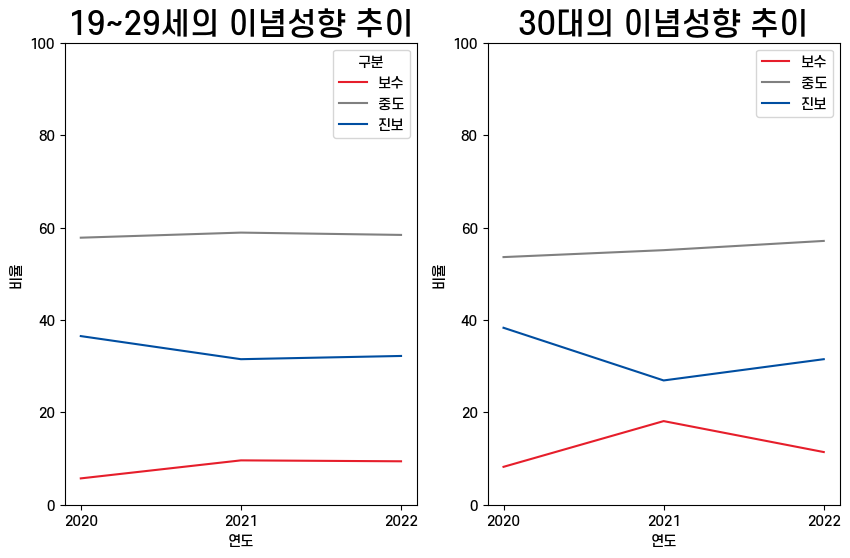

In [89]:
import seaborn as sns 

custom_palette = ['#E61E2B', '#808080', '#004EA1']

fig, ax = plt.subplots(figsize=(10, 6), ncols=2)
sns.lineplot(data = df20s, x = '연도', y = '비율', hue = '구분', ax = ax[0], palette=custom_palette)
ax[0].set_title("19~29세의 이념성향 추이", size=22)
ax[0].set_ylim(0, 100)

sns.lineplot(data = df30s, x = '연도', y = '비율', hue = '구분', ax = ax[1], palette=custom_palette)
ax[1].set_title("30대의 이념성향 추이", size=22)
ax[1].set_ylim(0, 100)
plt.legend(loc="best")
plt.show()

## 갤럽정당지지도

In [75]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
df = pd.read_excel('data/정당지지도_데이터.xlsx')
df['date'] = pd.to_datetime(df[['연도', '주']].astype(str).agg('-W'.join, axis=1) + '-5', format='%Y-W%W-%w')
df

,연도,월,주,정당,전체,서울,인천/경기,대전/세종/충청,광주/전라,대구/경북,부산/울산/경남,남자,여자,10~20,30대,40대,50대,60대이상,date
0,2020,1,2,국민의힘,23,27,20,22,4,32,32,23,15,25,15,16,29,37,2020-01-17
1,2020,1,2,더불어민주당,40,36,42,46,64,27,33,40,36,41,49,50,38,33,2020-01-17
2,2020,1,2,정의당,6,6,5,4,11,4,8,6,6,7,5,11,6,5,2020-01-17
3,2020,1,2,무당층,31,31,33,28,21,37,27,31,43,27,31,23,27,25,2020-01-17
4,2020,1,3,국민의힘,25,20,24,27,5,39,30,28,22,20,15,19,28,35,2020-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2022,12,2,무당층,27,31,26,30,25,25,26,27,27,45,33,25,21,20,2022-01-14
556,2022,12,3,국민의힘,36,37,35,29,6,58,47,36,36,25,30,22,38,54,2022-01-21
557,2022,12,3,더불어민주당,33,26,36,41,52,20,27,32,33,23,34,51,35,26,2022-01-21
558,2022,12,3,정의당,5,6,4,4,10,6,3,6,4,7,1,5,9,6,2022-01-21


In [77]:
df['정당'].unique()

array(['국민의힘', '더불어민주당', '정의당', '무당층'], dtype=object)

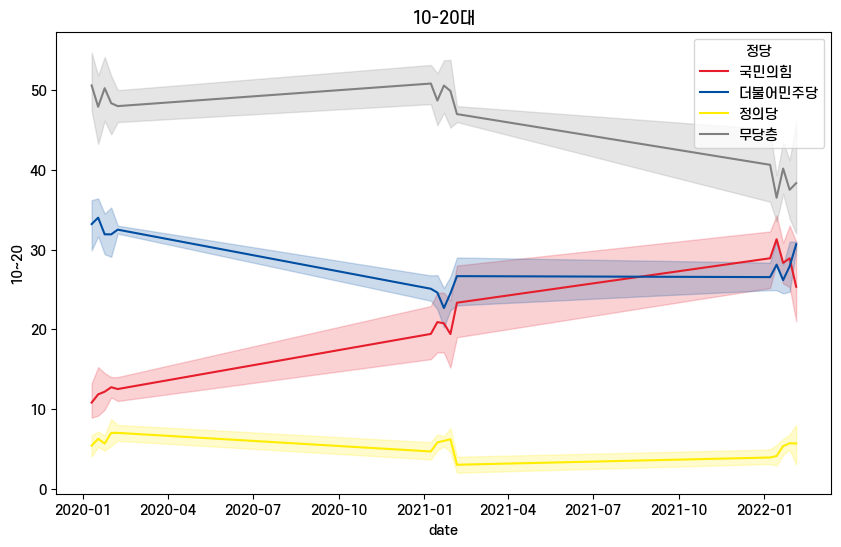

In [86]:
custom_palette = ['#E61E2B', '#004EA1', '#FFED00', '#808080']

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(df, x = 'date', y = '10~20', hue = '정당', palette=custom_palette)
ax.set_title("10-20대")
plt.savefig("output/10-20.png", dpi='figure')
plt.show()

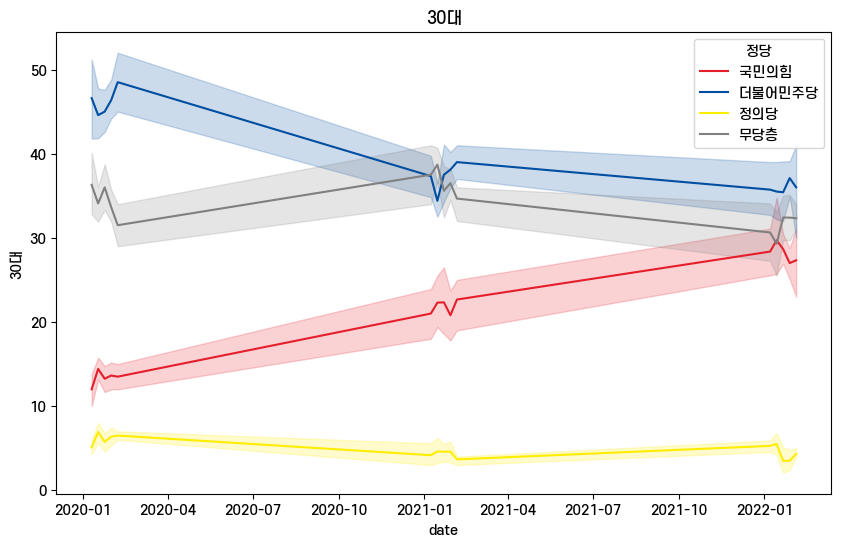

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(df, x = 'date', y = '30대', hue = '정당', palette=custom_palette)
ax.set_title("30대")
plt.savefig("output/30.png", dpi='figure')
plt.show()